In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.rcParams['font.family']       = ['sans-serif']
plt.rcParams['font.sans-serif']   = ['PingFang SC', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline



In [14]:
data1 = pd.read_csv('WorldCupsSummary.csv', encoding='latin1')
data2 = pd.read_csv('WorldCupMatches.csv',  encoding='latin1')
data3 = pd.read_csv('WorldCupPlayers.csv',  encoding='latin1')


Match counts per World Cup year:
Year
1930    18
1934    17
1938    18
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    52
1990    52
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    64
Name: count, dtype: int64

Year with most matches: 1998 (64 matches)
Year with least matches: 1934 (17 matches)
'Year' column has been processed and saved to WorldCupMatches.csv


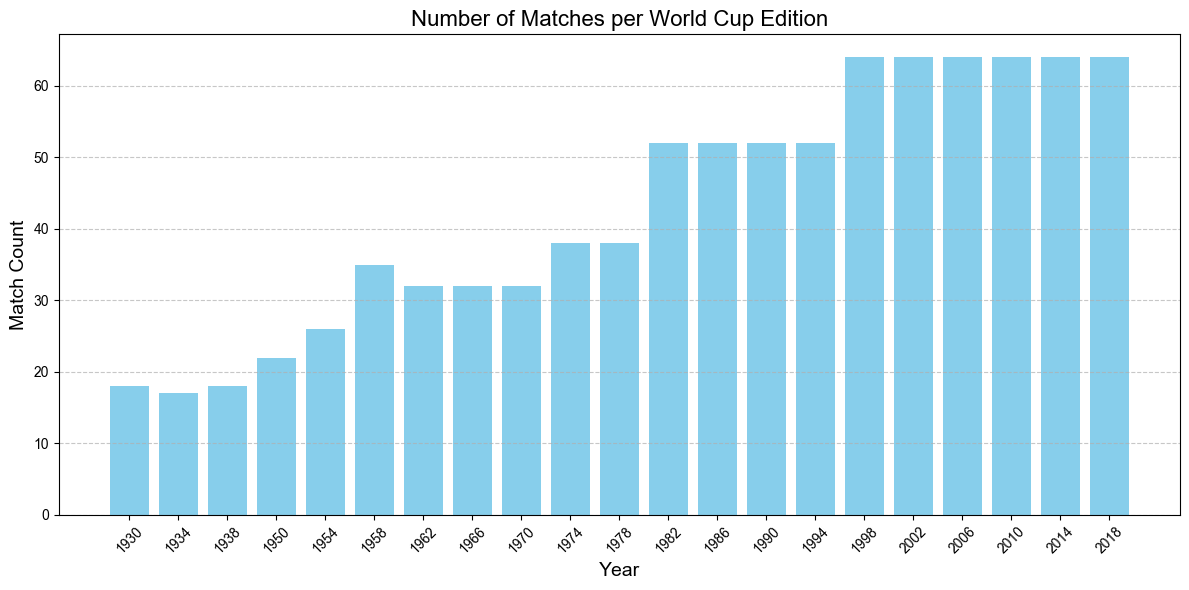

In [32]:
yearly_counts = data2['Year'].value_counts().sort_index()
print("Match counts per World Cup year:")
print(yearly_counts)

if not yearly_counts.empty:
    most_matches_year = yearly_counts.idxmax()
    least_matches_year = yearly_counts.idxmin()
    print(f"\nYear with most matches: {most_matches_year} ({yearly_counts.max()} matches)")
    print(f"Year with least matches: {least_matches_year} ({yearly_counts.min()} matches)")
else:
    print("No Year data found after processing.")

data2.to_csv('WorldCupMatches.csv', index=False)
print(f"'Year' column has been processed and saved to WorldCupMatches.csv")

if not yearly_counts.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color="skyblue")
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Match Count", fontsize=14)
    plt.title("Number of Matches per World Cup Edition", fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting the match trend.")


In [15]:
data1.head()
data1.info()       
data1.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             21 non-null     int64 
 1   HostCountry      21 non-null     object
 2   Winner           21 non-null     object
 3   Second           21 non-null     object
 4   Third            21 non-null     object
 5   Fourth           21 non-null     object
 6   GoalsScored      21 non-null     int64 
 7   QualifiedTeams   21 non-null     int64 
 8   MatchesPlayed    21 non-null     int64 
 9   Attendance       21 non-null     int64 
 10  HostContinent    21 non-null     object
 11  WinnerContinent  21 non-null     object
dtypes: int64(5), object(7)
memory usage: 2.1+ KB


Year               0
HostCountry        0
Winner             0
Second             0
Third              0
Fourth             0
GoalsScored        0
QualifiedTeams     0
MatchesPlayed      0
Attendance         0
HostContinent      0
WinnerContinent    0
dtype: int64

Text(0, 0.5, 'Matches Played')

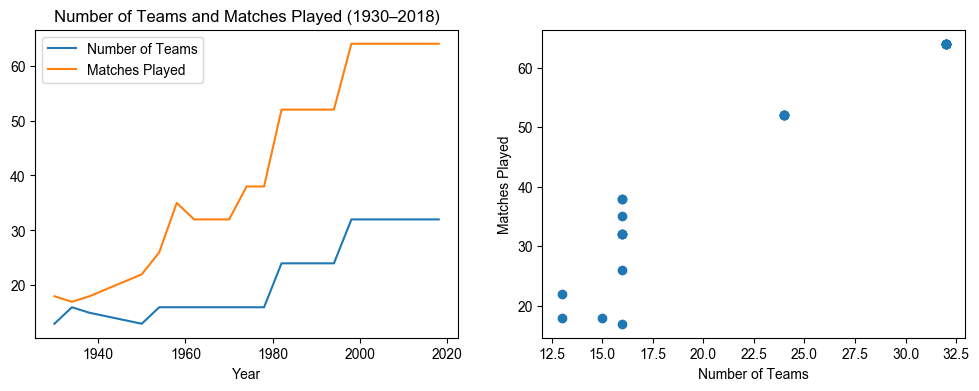

In [16]:

plt.figure(figsize=(12, 4))

plt.subplot(121)
# Plot line chart
plt.plot(data1['Year'], data1['QualifiedTeams'], label='Number of Teams')
plt.plot(data1['Year'], data1['MatchesPlayed'], label='Matches Played')

plt.legend()
plt.title('Number of Teams and Matches Played (1930–2018)')
plt.xlabel('Year')

plt.subplot(122)
plt.scatter(x=data1['QualifiedTeams'], y=data1['MatchesPlayed'])
plt.xlabel('Number of Teams')
plt.ylabel('Matches Played')


In [20]:
def grade(x):
    """
    Return the index (position) of the first repeat of x[0] in the rest of the row.
    If no repeat is found, return 0.
    """
    for i in range(1, len(x)):
        if x[i] == x[0]:
            return i
    return 0
# Count how many times each country has hosted the World Cup
data1_country = data1.groupby('HostCountry')['Year'].count()
print(f"Among {len(data1_country)} countries, {len(data1_country[data1_country > 1])} have hosted the World Cup more than once.")
data1_country[data1_country > 1]

# Extract the columns for ranking analysis (e.g. Winner, Runner‑up, Third place, Fourth place)
data1_grade = data1.iloc[:, [1,2,3,4,5]].copy()
data1_grade['grade'] = data1_grade.apply(grade, axis=1)



# Apply the function and show the first few rows
data1_grade['grade'] = data1_grade.apply(grade, axis=1)
data1_grade.head()

Among 16 countries, 5 have hosted the World Cup more than once.


,HostCountry,Winner,Second,Third,Fourth,grade
0,Uruguay,Uruguay,Argentina,USA,Yugoslavia,1
1,Italy,Italy,Czechoslovakia,Germany,Austria,1
2,France,Italy,Hungary,Brazil,Sweden,0
3,Brazil,Uruguay,Brazil,Sweden,Spain,2
4,Switzerland,Germany FR,Hungary,Austria,Uruguay,0


Host champion countries: 0       Uruguay
1         Italy
7       England
10    Argentina
15       France
Name: HostCountry, dtype: object


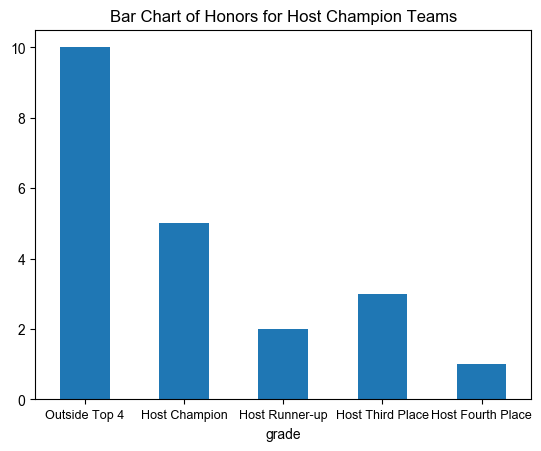

In [21]:

# Plot a bar chart of honors by grade
data1_grade.groupby('grade')['HostCountry'].count().plot(kind='bar')

# Set x‑axis tick labels
x = [0, 1, 2, 3, 4]
plt.xticks(
    x,
    ['Outside Top 4', 'Host Champion', 'Host Runner‑up', 'Host Third Place', 'Host Fourth Place'],
    rotation=0,
    fontsize=9
)

plt.title('Bar Chart of Honors for Host Champion Teams')

# Print the list of countries that were champions as hosts
print('Host champion countries:', data1_grade[data1_grade['grade'] == 1]['HostCountry'])

Text(0.5, 0.98, 'Top 5 Countries by 1st/2nd/3rd/4th Place Finishes')

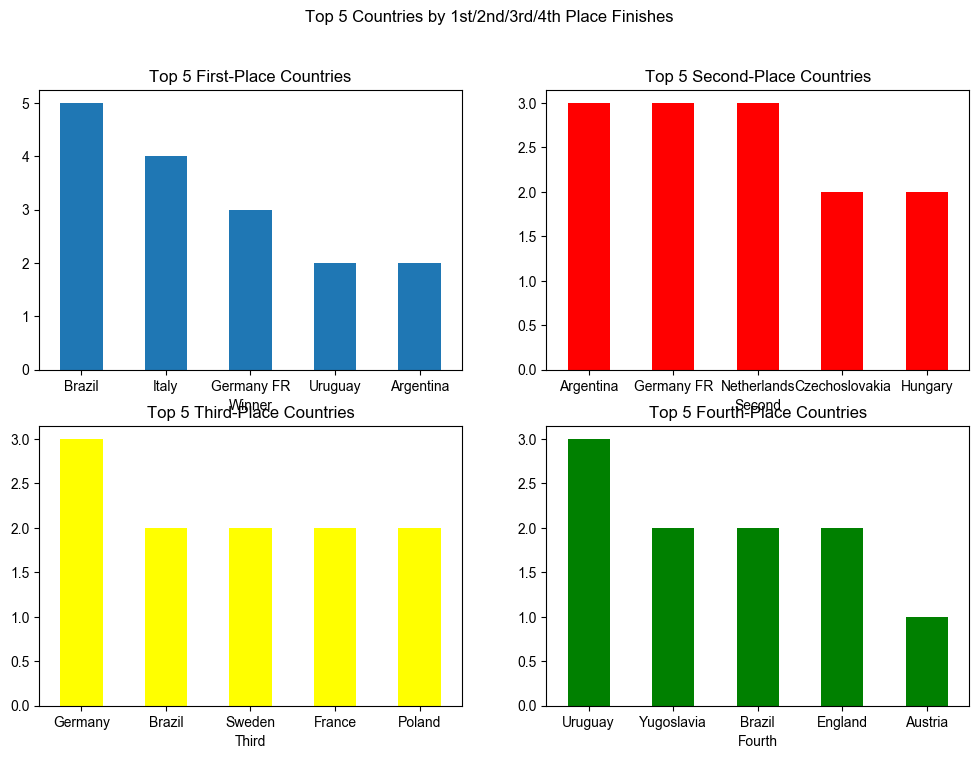

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
data1_grade['Winner'].value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Top 5 First‑Place Countries')

plt.subplot(222)
data1_grade['Second'].value_counts().head(5).plot(kind='bar', color='red')
plt.xticks(rotation=0)
plt.title('Top 5 Second‑Place Countries')

plt.subplot(223)
data1_grade['Third'].value_counts().head(5).plot(kind='bar', color='yellow')
plt.xticks(rotation=0)
plt.title('Top 5 Third‑Place Countries')

plt.subplot(224)
data1_grade['Fourth'].value_counts().head(5).plot(kind='bar', color='green')
plt.xticks(rotation=0)
plt.title('Top 5 Fourth‑Place Countries')

plt.suptitle('Top 5 Countries by 1st/2nd/3rd/4th Place Finishes')


WorldCupMatches  Analyze

In [23]:
# Display the count of missing values for each column
print(data2.isnull().sum())

# Compare the original and filtered lengths (keeping rows where columns 6, 7, 10, and 11 are all >= 0)
print('Original length:', len(data2),
      'Filtered length:', len(data2[(data2.iloc[:, [6, 7, 10, 11]] >= 0).all(axis=1)]))


Year                  0
Datetime              0
Stage                 0
Stadium               0
City                  0
Hometeamname          0
Hometeamgoals         0
Awayteamgoals         0
Awayteamname          0
Winconditions        59
Attendance            0
Halftimehomegoals     0
Halftimeawaygoals     0
Referee               0
Assistant1            0
Assistant2            0
Roundid               0
Matchid               0
Hometeaminitials      0
Awayteaminitials      0
latitude              8
longitude             8
koppen_code          20
koppen_desc          36
dtype: int64
Original length: 900 Filtered length: 900


In [25]:

a1 = (
    data2
    .groupby('Hometeamname')['Year']
    .count()
    .reset_index()
    .rename(columns={
        'Hometeamname': 'team',
        'Year': 'home_match_count'
    })
)

a2 = (
    data2
    .groupby('Awayteamname')['Year']
    .count()
    .reset_index()
    .rename(columns={
        'Awayteamname': 'team',
        'Year': 'away_match_count'
    })
)

group = pd.merge(left=a1, right=a2, how='outer').fillna(0)

group['win_rate'] = round(
    group['home_match_count'] /
    (group['home_match_count'] + group['away_match_count']),
    2
)
group['loss_rate'] = round(
    group['away_match_count'] /
    (group['home_match_count'] + group['away_match_count']),
    2
)

group


,team,home_match_count,away_match_count,win_rate,loss_rate
0,Algeria,6.0,7,0.46,0.54
1,Angola,1.0,2,0.33,0.67
2,Argentina,54.0,27,0.67,0.33
3,Australia,7.0,9,0.44,0.56
4,Austria,13.0,16,0.45,0.55
...,...,...,...,...,...
80,"rn"">United Arab Emirates",1.0,2,0.33,0.67
81,Dutch East Indies,0.0,1,0.00,1.00
82,El Salvador,0.0,6,0.00,1.00
83,Israel,0.0,3,0.00,1.00


Text(0.5, 1.0, 'Top 10 Teams by Loss Rate')

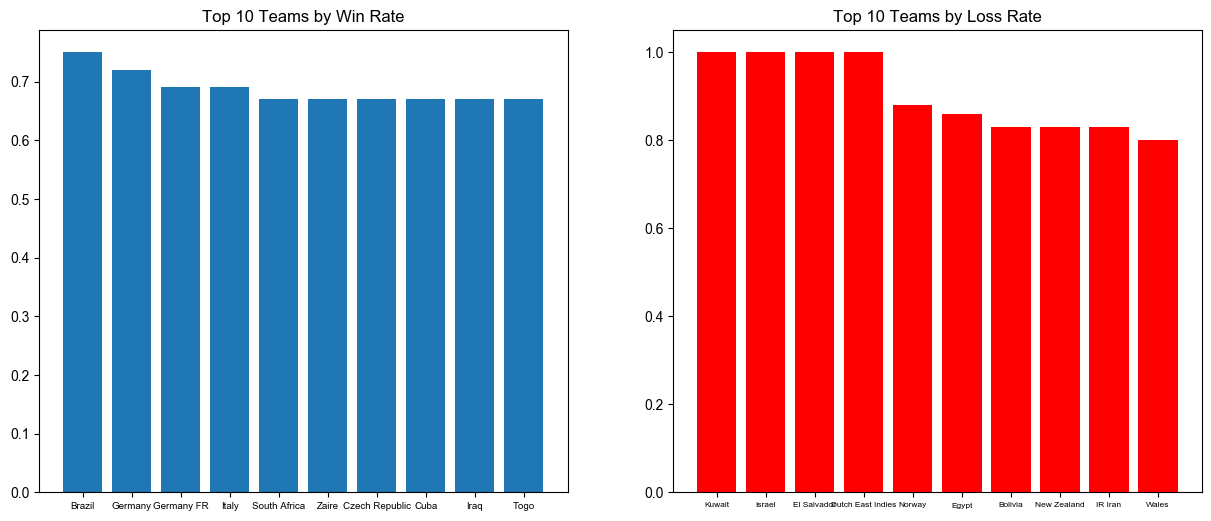

In [26]:
# Make sure you have these columns:
#   group['win_rate']  and  group['loss_rate']
win = group.sort_values('win_rate', ascending=False)\
           .head(10)[['team','win_rate']]
lose = group.sort_values('loss_rate', ascending=False)\
            .head(10)[['team','loss_rate']]

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.bar(x=win['team'], height=win['win_rate'])
plt.xticks(fontsize=7)
plt.title('Top 10 Teams by Win Rate')

plt.subplot(122)
plt.bar(x=lose['team'], height=lose['loss_rate'], color='red')
plt.xticks(fontsize=6)
plt.title('Top 10 Teams by Loss Rate')


count     85.000000
mean      21.176471
std       22.096744
min        1.000000
25%        5.000000
50%       13.000000
75%       30.000000
max      109.000000
Name: count, dtype: float64


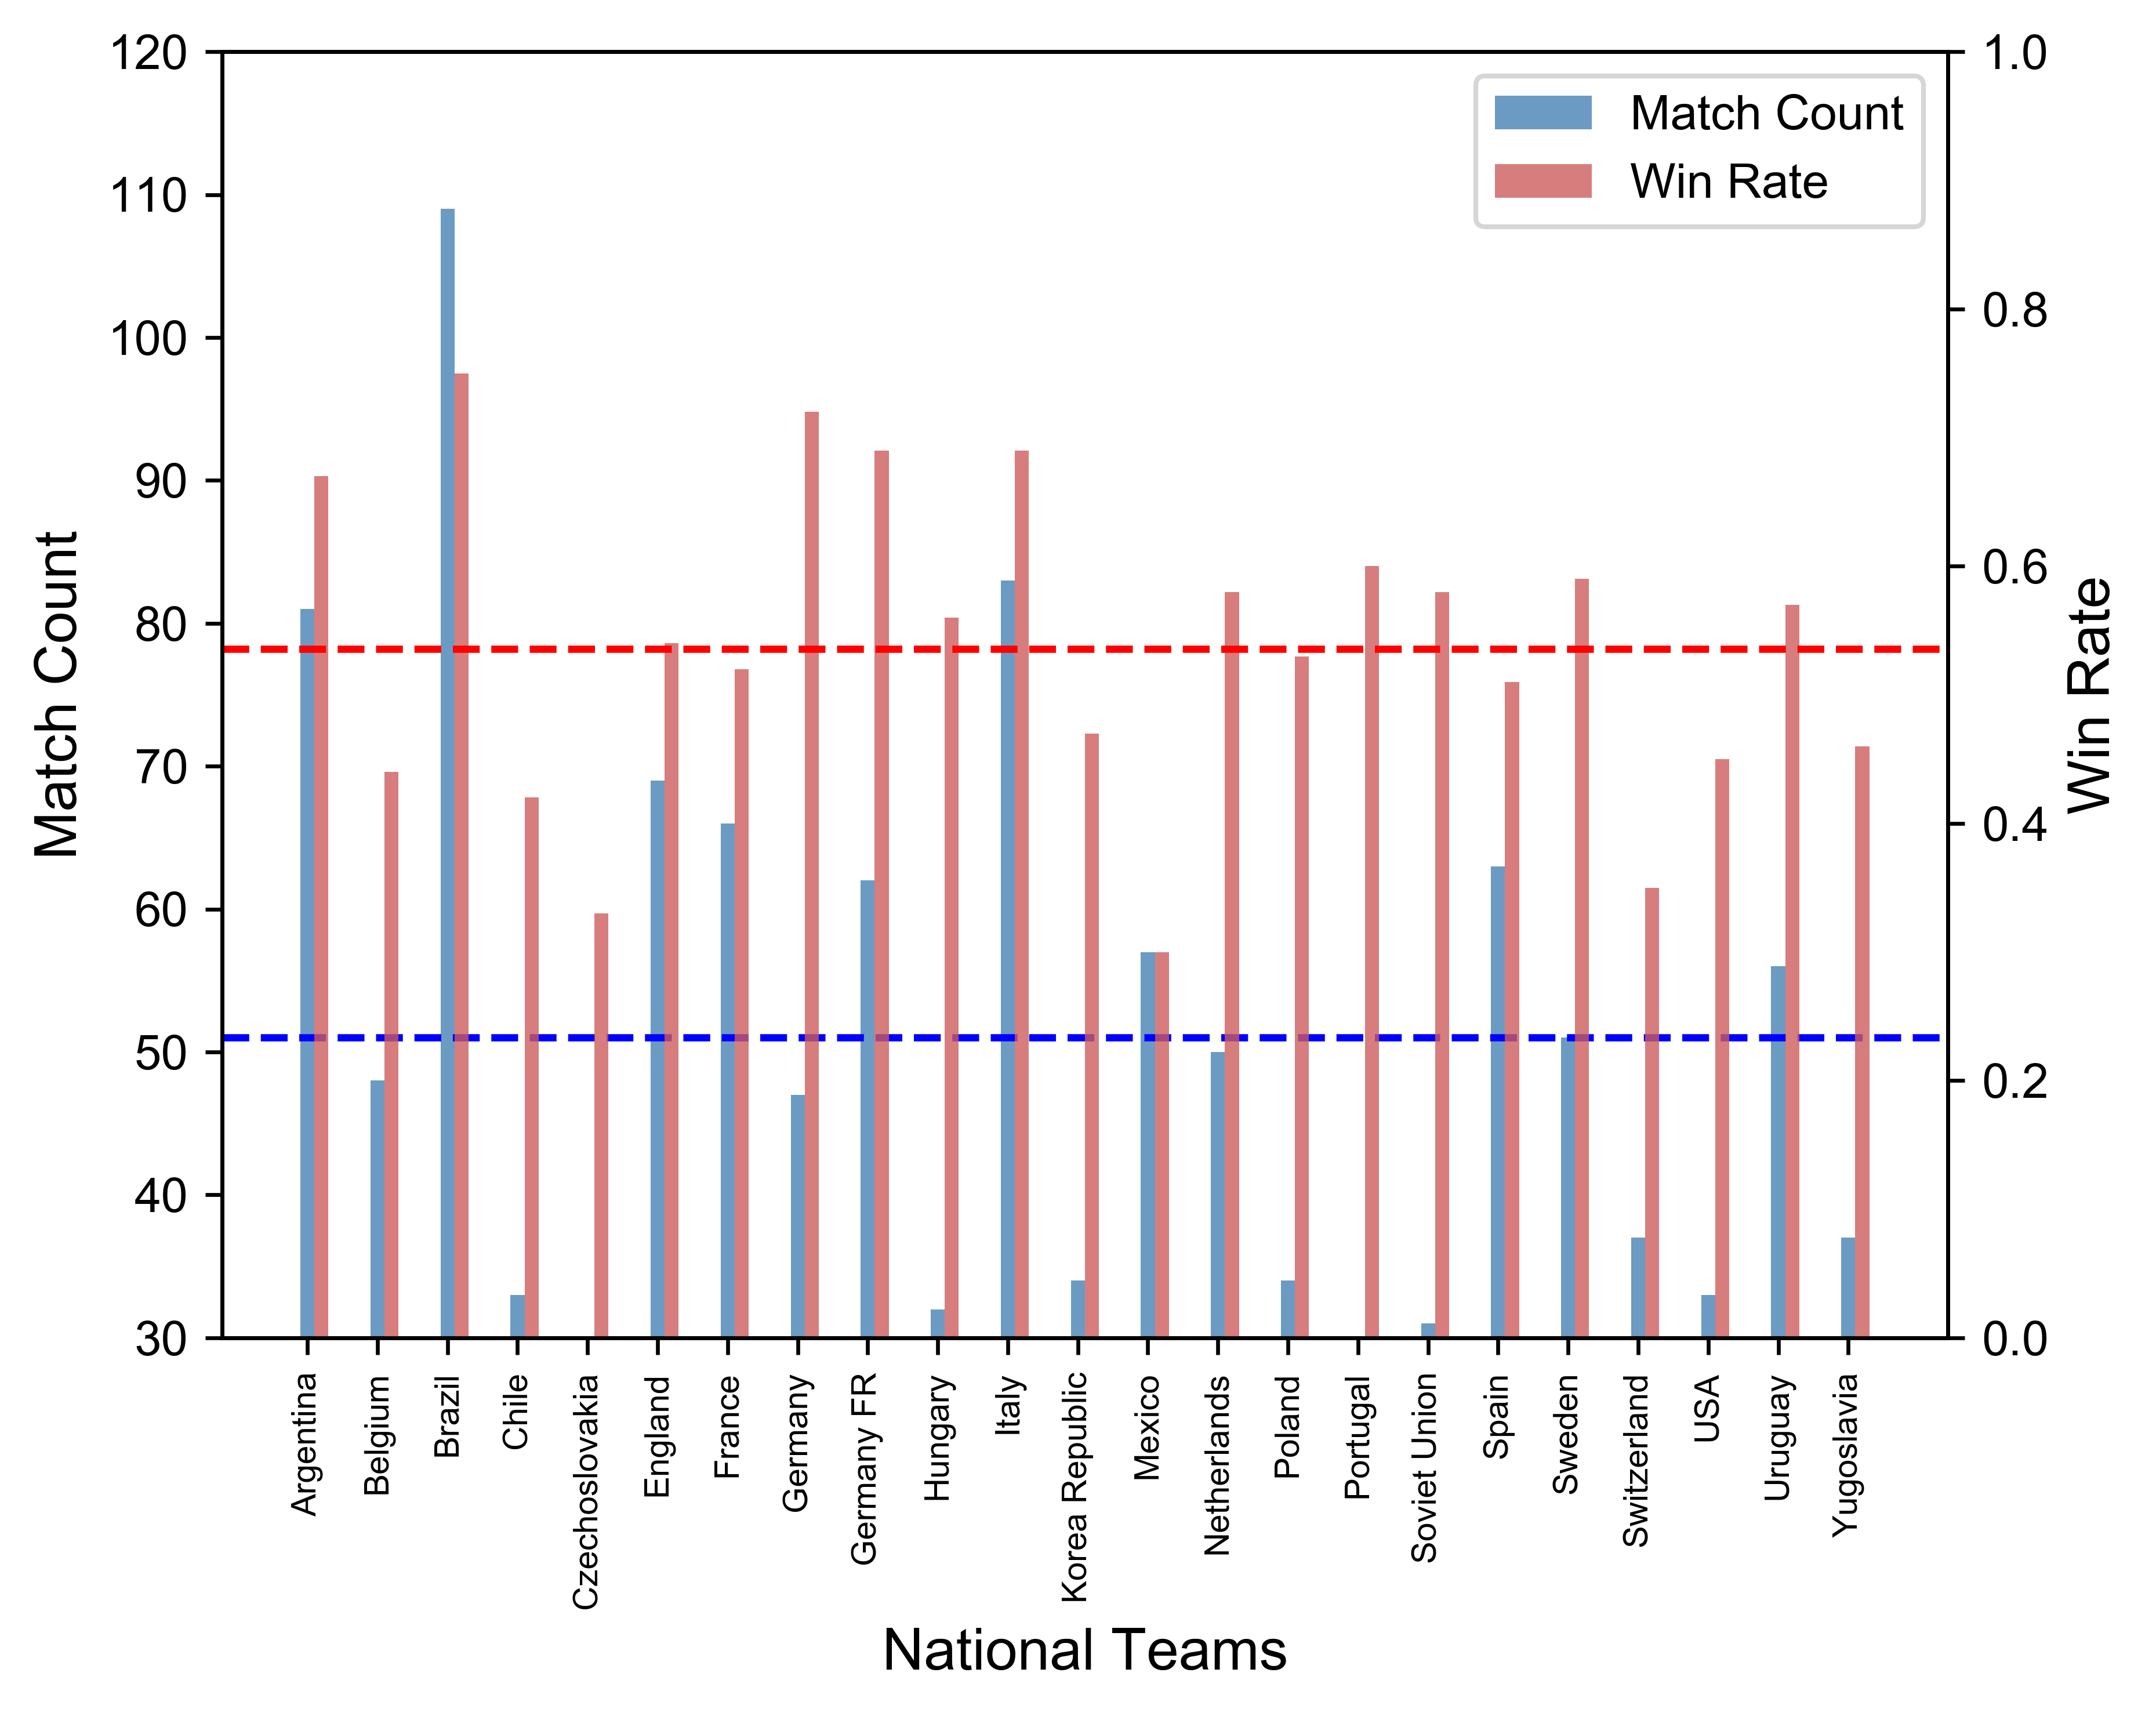

In [27]:

# Compute total matches from the actual column names
group['count'] = group['home_match_count'] + group['away_match_count']
print(group['count'].describe())
# The maximum value is 108; the mean and median are much smaller, indicating a right‑skewed long‑tail distribution.

# Select teams with at least 30 matches
group1 = group[group['count'] >= 30]

# Plot
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111)
ax.set_ylim([30, 120])

xdata = np.arange(1, len(group1) + 1)
bar_width = 0.2

# Primary bar: match counts
ax.set_ylabel('Match Count', fontsize=12, fontweight='bold')
lns1 = ax.bar(
    x=xdata,
    height=group1['count'],
    width=bar_width,
    label='Match Count',
    fc='steelblue',
    alpha=0.8
)
ax.axhline(
    y=group1['count'].mean(),
    color='blue',
    linestyle='dashed'
)  # Average match count line

# Secondary axis: win rates
ax1 = ax.twinx()
ax1.set_ylim(0, 1)
ax1.set_yticks(np.arange(0, 1.1, 0.2))
ax1.set_ylabel('Win Rate', fontsize=12, fontweight='bold')
lns2 = ax1.bar(
    x=xdata + bar_width,
    height=group1['win_rate'],
    width=bar_width,
    label='Win Rate',
    fc='indianred',
    alpha=0.8
)

# X‑axis labels
ax.set_xticks(xdata)
ax.set_xlabel('National Teams', fontsize=12)
ax.set_xticklabels(group1['team'], fontsize=7, rotation='vertical')

# Legend and average win rate line
ax.legend([lns1, lns2], ['Match Count', 'Win Rate'], loc='upper right')
ax1.axhline(
    y=group1['win_rate'].mean(),
    color='red',
    linestyle='dashed'
)  # Average win rate line

plt.show()

Spearman correlation:              count  win_rate
count     1.000000  0.391885
win_rate  0.391885  1.000000


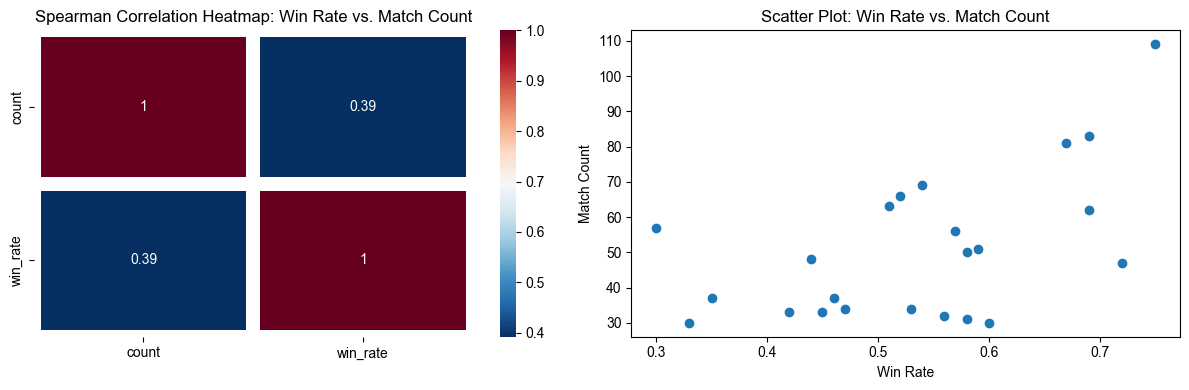

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

# Compute Spearman correlation between match count and win rate
cor = group1[['count', 'win_rate']]
print('Spearman correlation:', cor.corr(method='spearman'))

plt.figure(figsize=(12, 4))

# Heatmap of the Spearman correlation
plt.subplot(121)
sns.heatmap(
    data=cor.corr(method='spearman'),
    annot=True,
    cmap='RdBu_r',
    linewidths=10
)
plt.title('Spearman Correlation Heatmap: Win Rate vs. Match Count')

# Scatter plot of win rate vs. match count
plt.subplot(122)
plt.scatter(x=group1['win_rate'], y=group1['count'])
plt.title('Scatter Plot: Win Rate vs. Match Count')
plt.xlabel('Win Rate')
plt.ylabel('Match Count')

plt.tight_layout()
plt.show()

In [29]:
data21 = data2[(data2['Stage'] == 'Quarter-finals') | (data2['Stage'] == 'Semi-finals') | (data2['Stage'] == 'Final')]
data21.head()
 
pivot_tabel=data21.pivot_table(index='Home Team Name',
                          columns='Stage',
                          values='Home Team Goals',
                          aggfunc='count').fillna(0)
pivot_tabel=pivot_tabel.reset_index()
pivot_tabel.rename(columns={'Home Team Name':'team'},inplace=True)
grade=pd.merge(left=group,right=pivot_tabel,how='outer')
grade=grade.fillna(0)
grade


KeyError: 'Home Team Goals'

In [6]:
grade_sum=grade.iloc[:,[0,3,5,6,7,8]]
grade_sum=grade_sum.set_index(grade_sum.columns[0])
grade_sum_copy=grade_sum  #创建副本
grade_sum


NameError: name 'grade' is not defined

In [7]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assume `grade_sum` is your DataFrame with columns:
# ['win_rate', 'count', 'Final', 'Quarter-finals', 'Semi-finals']

# 1. Normalize the data
normalized_data = StandardScaler().fit_transform(grade_sum)
df = pd.DataFrame(normalized_data, columns=grade_sum.columns)

# 2. Set number of clusters
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=123)
kmeans_model.fit(df)

# 3. Retrieve cluster centers and labels
cluster_centers = kmeans_model.cluster_centers_
cluster_labels  = kmeans_model.labels_
cluster_counts  = pd.Series(cluster_labels).value_counts()

# 4. Build a DataFrame of cluster centers
cluster_center_df = pd.DataFrame(
    cluster_centers,
    columns=['win_rate', 'count', 'Final', 'Quarter-finals', 'Semi-finals']
)
cluster_center_df.index = [1, 2, 3, 4]

print(cluster_center_df)

NameError: name 'grade_sum' is not defined

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Assume cluster_center_df already exists with the format:
#               win_rate   count   Final   Quarter-finals   Semi-finals
# 1              0.50     -0.10    1.25       0.75            -0.40
# 2             -0.20      1.30   -0.80      -1.10             0.60
# 3              1.10     -0.90    0.10       0.55            -0.85
# 4             -1.40      0.70   -0.55       0.30             0.65

# 1. Define the radar chart dimensions and angles
labels = ['win_rate', 'count', 'Final', 'Quarter-finals', 'Semi-finals']
N = len(labels)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # close the loop

# 2. Close the loop by appending the first value of each row to its end
centers = cluster_center_df[labels].values
centers_closed = np.hstack([centers, centers[:, [0]]])

# 3. Layout subplots
categories = cluster_center_df.index.tolist()
ncols = 3
nrows = int(np.ceil(len(categories) / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4 * ncols, 4 * nrows),
    subplot_kw={'projection': 'polar'}
)

# Reshape axes into an nrows × ncols array
axes = np.array(axes).reshape(nrows, ncols)

# 4. Plot a radar chart for each cluster
for i, cat in enumerate(categories):
    row, col = divmod(i, ncols)
    ax = axes[row, col]
    
    vals = centers_closed[i]
    ax.plot(angles, vals, linewidth=2)
    ax.fill(angles, vals, alpha=0.3)
    
    # Only set grid labels for the first N angles
    ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)
    ax.set_title(f"Cluster {cat}", va='bottom', fontsize=12)

# 5. Remove any extra empty subplots
total = nrows * ncols
for j in range(len(categories), total):
    r, c = divmod(j, ncols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()


NameError: name 'cluster_center_df' is not defined

Explained variance ratio of principal components: [0.77616579 0.1376442  0.05469635 0.02161515 0.00987851]
Principal components vectors: [[ 3.16649641e-01  4.54336624e-01  4.68866168e-01  4.93289594e-01
   4.79730268e-01]
 [-9.37890725e-01  2.66213774e-02  2.30617618e-01  1.68884026e-01
   1.94797306e-01]
 [-1.41744857e-01  8.39114485e-01 -4.73799183e-01 -1.15195780e-02
  -2.26223143e-01]
 [-1.37823608e-03 -1.58739001e-01 -6.40060697e-01  2.47737839e-02
   7.51337869e-01]
 [ 6.98919607e-04 -2.52107804e-01 -3.04658282e-01  8.52875795e-01
  -3.40921364e-01]]
Eigenvalues: [3.92815614 0.69661392 0.27681687 0.10939375 0.04999492]


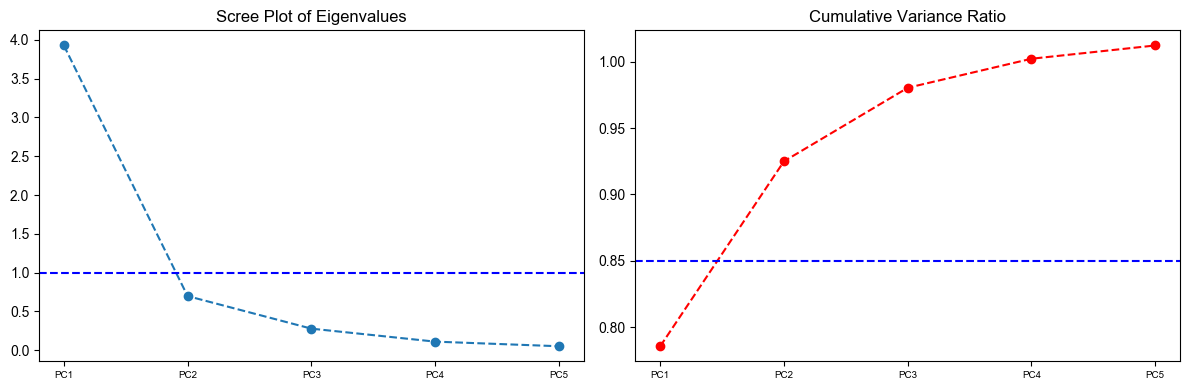

In [32]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data using a standard scaler
scaler = StandardScaler()
# Note: we're fitting and transforming the previously created copy of the data
data_scaled = scaler.fit_transform(grade_sum_copy)

# Perform PCA on the scaled data
pca = PCA()
pca.fit(data_scaled)

# Print the explained variance ratio and principal component vectors
print('Explained variance ratio of principal components:', pca.explained_variance_ratio_)
print('Principal components vectors:', pca.components_)

# Compute the covariance matrix and its eigenvalues
cov_matrix = np.cov(data_scaled, rowvar=False)
eigenvalues = np.linalg.eigvals(cov_matrix)
print('Eigenvalues:', eigenvalues)

# Plot the scree plot and cumulative variance ratio
plt.figure(figsize=(12, 4))

# Scree plot of eigenvalues
plt.subplot(1, 2, 1)
plt.plot(eigenvalues, linestyle='--', marker='o')
plt.xticks([0, 1, 2, 3, 4], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], fontsize=7)
plt.axhline(y=1, color='blue', linestyle='dashed')
plt.title('Scree Plot of Eigenvalues')

# Cumulative variance ratio plot
plt.subplot(1, 2, 2)
cum_var_ratio = np.cumsum(eigenvalues) / len(eigenvalues)
plt.plot(cum_var_ratio, linestyle='--', marker='o', color='red')
plt.xticks([0, 1, 2, 3, 4], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], fontsize=7)
plt.axhline(y=0.85, color='blue', linestyle='dashed')
plt.title('Cumulative Variance Ratio')

plt.tight_layout()
plt.show()


Principal component vectors: [[ 0.31664964  0.45433662  0.46886617  0.49328959  0.47973027]
 [-0.93789073  0.02662138  0.23061762  0.16888403  0.19479731]]


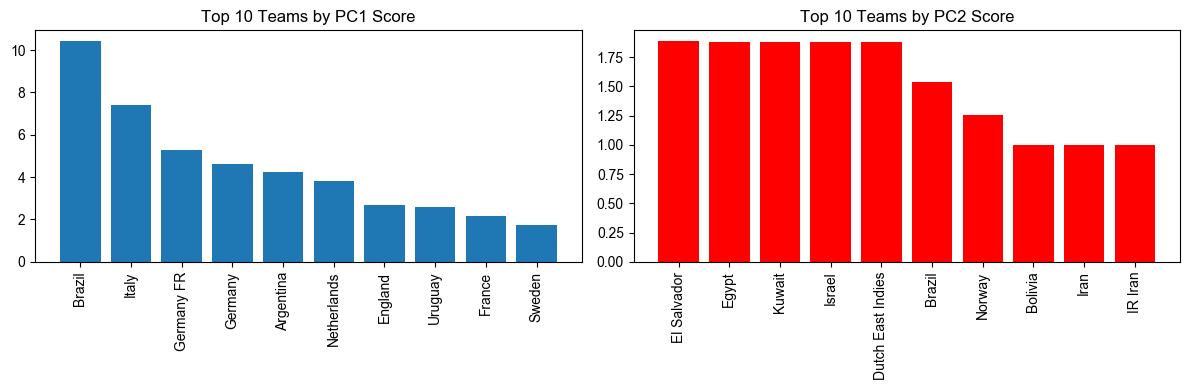

In [33]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA with 2 components
pca1 = PCA(n_components=2)
pca1.fit(data_scaled)

# Transform the scaled data into the 2 principal components
data_reduced = pca1.transform(data_scaled)
data_reduced_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])
data_reduced_df['team'] = group['team']

# Create tables of the top 10 teams by each principal component score
top10_pc1 = data_reduced_df.sort_values('PC1', ascending=False).head(10)
top10_pc2 = data_reduced_df.sort_values('PC2', ascending=False).head(10)

# Plot bar charts for the top 10 teams on each component
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(top10_pc1['team'], top10_pc1['PC1'])
plt.xticks(fontsize=10, rotation=90)
plt.title('Top 10 Teams by PC1 Score')

plt.subplot(1, 2, 2)
plt.bar(top10_pc2['team'], top10_pc2['PC2'], color='red')
plt.xticks(fontsize=10, rotation=90)
plt.title('Top 10 Teams by PC2 Score')

# Print the principal component vectors
print('Principal component vectors:', pca1.components_)

plt.tight_layout()
plt.show()


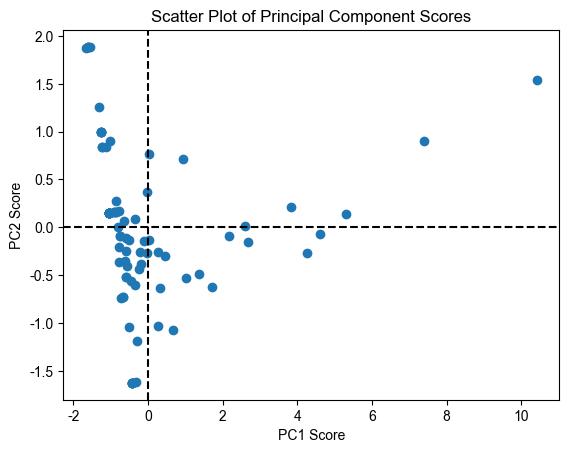

In [34]:

# Plot a scatter plot of the two principal components
plt.scatter(x=data_reduced_df['PC1'], y=data_reduced_df['PC2'])
plt.axhline(y=0, linestyle='dashed', color='black')
plt.axvline(x=0, linestyle='dashed', color='black')
plt.xlabel('PC1 Score')
plt.ylabel('PC2 Score')
plt.title('Scatter Plot of Principal Component Scores')
plt.show()


player

In [35]:
# 3.1 Data Preprocessing
# Check for missing values in each column
data3.isnull().sum()

# Replace all remaining nulls with the string 'Other'
data3 = data3.fillna('Other')


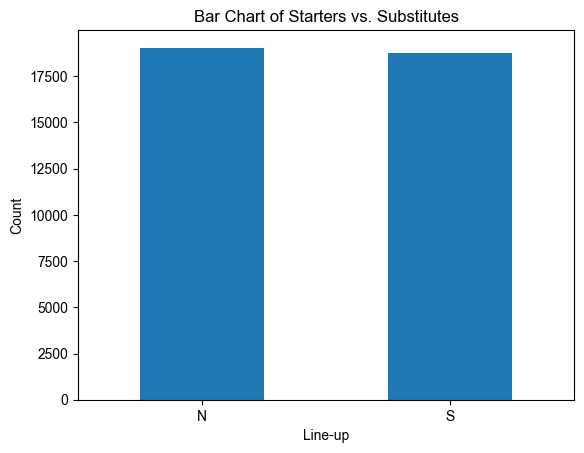

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

# 3.2 Analysis of Starters vs. Substitutes
# Plot a bar chart showing how many rounds each Line‑up category appears in
data3.groupby('Line-up')['RoundID'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Bar Chart of Starters vs. Substitutes')
plt.ylabel('Count')
plt.show()

# Pivot table counting positions for each Line‑up category
line_pivot = data3.groupby(['Line-up', 'Position'])['Position'].count().unstack()
line_pivot = line_pivot.fillna(0)

colors = ['blue', 'red']
# For each Line‑up category (except the last two), plot a bar chart of Position counts
for i in range(len(line_pivot.index) - 2):
    plt.figure(figsize=(12, 4))
    plt.bar(line_pivot.columns, line_pivot.iloc[i, :], color=colors[i], label=line_pivot.index[i])
    plt.legend()
    plt.title(f"Position Counts for '{line_pivot.index[i]}'")
    plt.show()

# Super‑title for the collection of charts
plt.suptitle('Statistics of Positions by Starters/Substitutes')
plt.show()


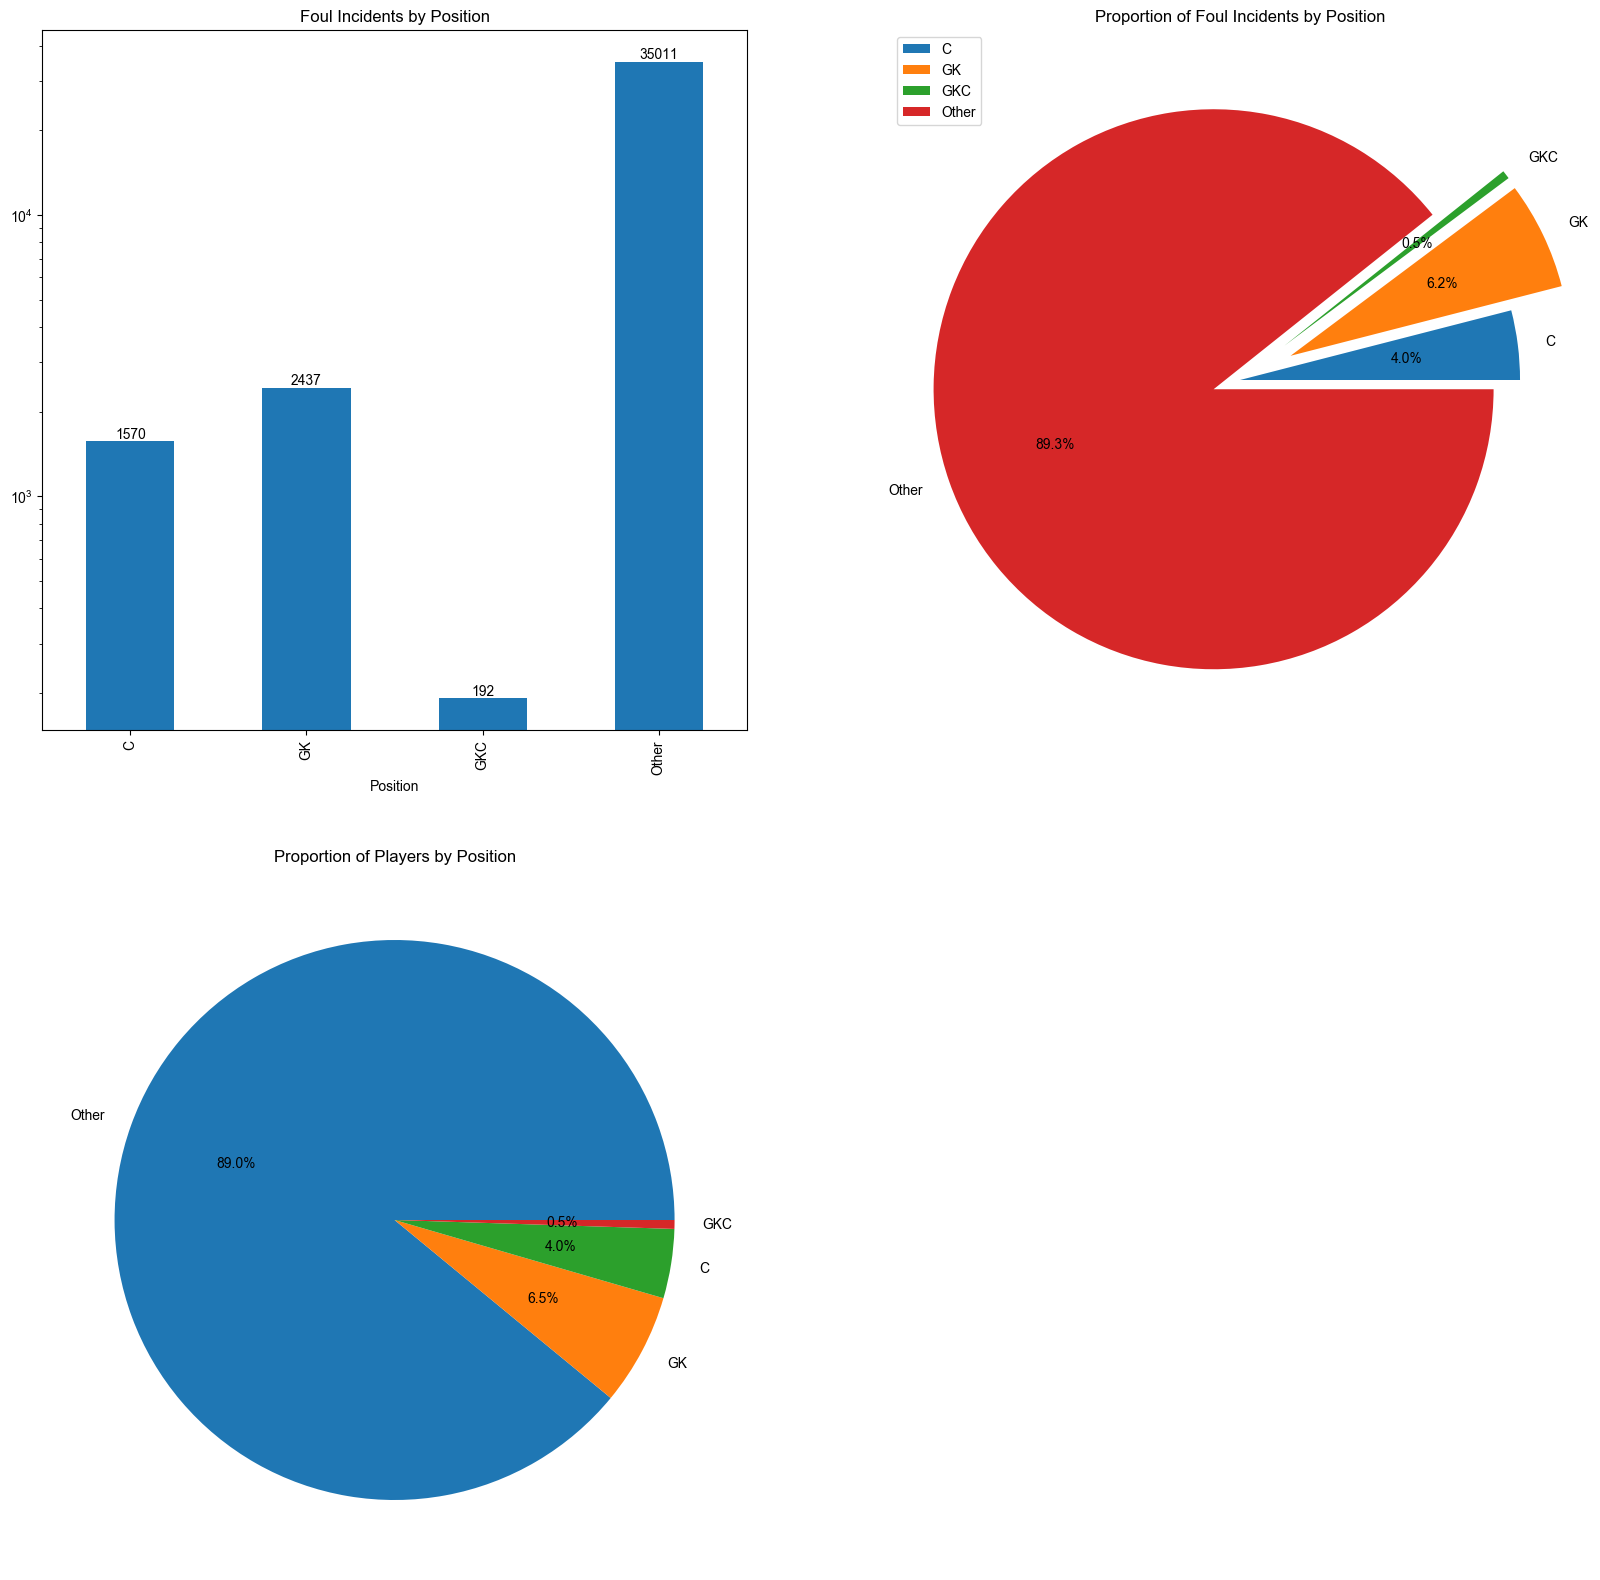

In [37]:
import matplotlib.pyplot as plt

# 3.3 Analysis of Match Events by Position

# Define a function that counts events: if no events, return 0; otherwise count objects in the string
def event(x):
    if len(x) == 0:
        return 0
    else:
        return len(x) // 4

# Apply the function to create a new 'events' column
data3['events'] = data3['Event'].apply(event)

# Scatter through the last few rows to verify
data3.tail()

# Plot total events per Position on various subplots
plt.figure(figsize=(20, 20))

# (a) Bar chart of total events (log scale)
plt.subplot(221)
pos_events = data3.groupby('Position')['events'].sum()
pos_events.plot(kind='bar')
for i, v in enumerate(pos_events):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.yscale('log')
plt.title('Foul Incidents by Position')

# (b) Pie chart of event proportions by Position
plt.subplot(222)
pos_events.plot.pie(autopct='%1.1f%%', explode=[0, 0.2, 0.2, 0.1])
plt.ylabel('')
plt.title('Proportion of Foul Incidents by Position')
plt.legend(loc='upper left')

# (c) Pie chart of player counts by Position
plt.subplot(223)
data3['Position'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proportion of Players by Position')

plt.show()


Number of players who won the final: 491


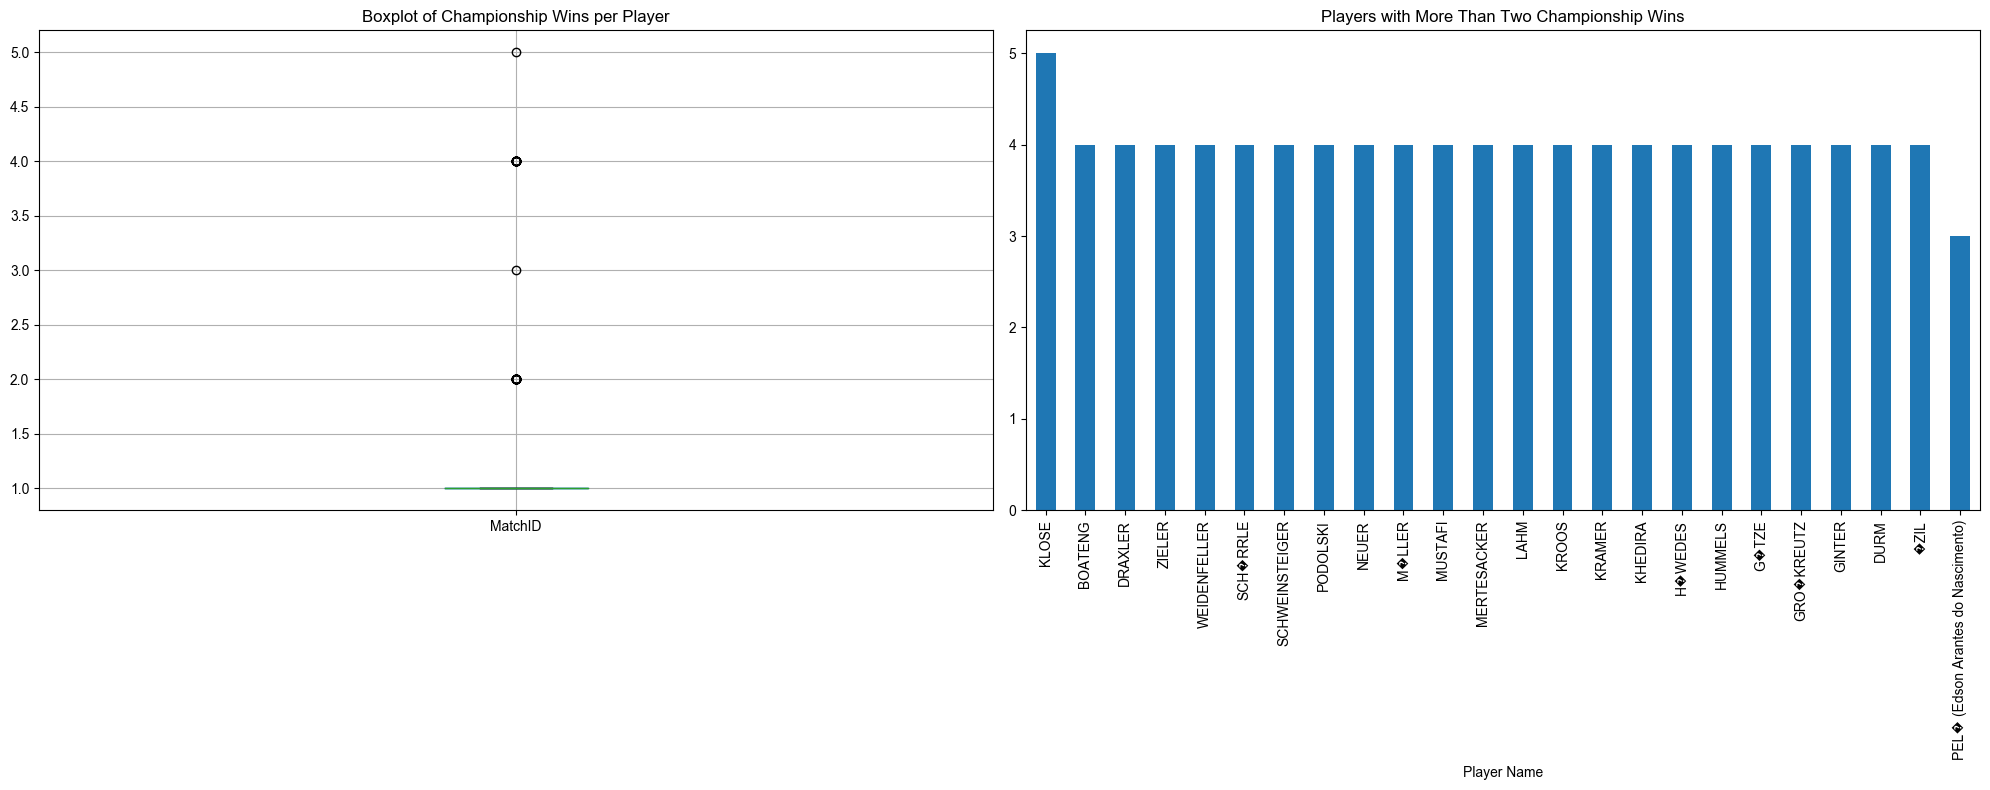

In [38]:
import matplotlib.pyplot as plt

# 3.4 Analysis of Players Who Won the Final

# Extract the team initials and MatchID of finals winners from data2
win_name = data2[['Home Team Initials', 'MatchID']][data2['Stage'] == 'Final']
win_name.columns = ['Team Initials', 'MatchID']

# Merge with data3 to get only the records of players who won a final
data3_win = data3.merge(win_name, on=['Team Initials', 'MatchID'], how='inner')
print('Number of players who won the final:', len(data3_win))

# Display the merged DataFrame
data3_win

# Plotting championship counts per player
plt.figure(figsize=(20, 8))

# (a) Boxplot of championship counts
plt.subplot(121)
player_win = data3_win.groupby('Player Name')['MatchID'].count().reset_index()
player_win.boxplot()
plt.title('Boxplot of Championship Wins per Player')

# (b) Bar chart of players with more than two championships
plt.subplot(122)
player_win = player_win.set_index('Player Name')
player_win['MatchID'][player_win['MatchID'] > 2]\
    .sort_values(ascending=False)\
    .plot(kind='bar')
plt.title('Players with More Than Two Championship Wins')

plt.tight_layout()
plt.show()


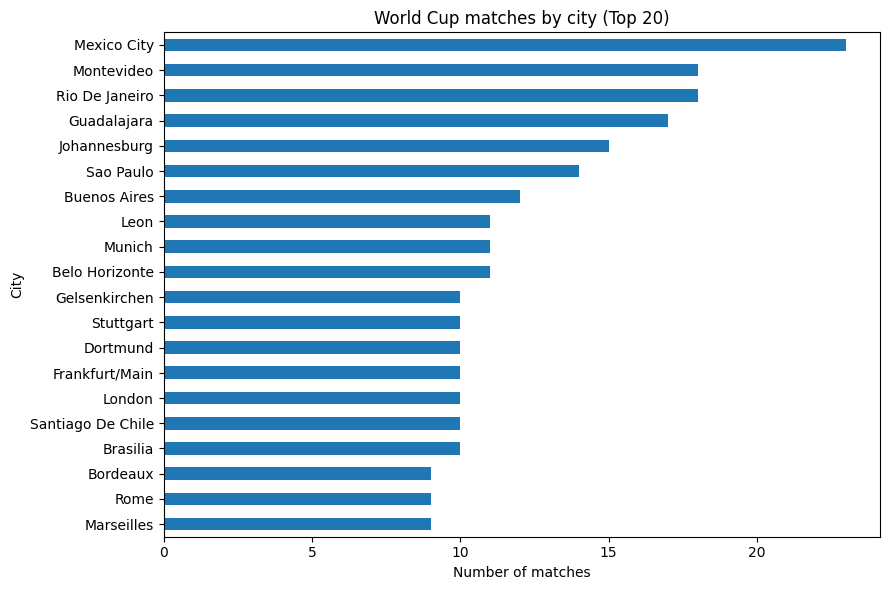

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

matches = pd.read_csv("WorldCupMatches (2).csv")

matches['City'] = matches['City'].astype(str).str.strip()

city_counts = matches['City'].value_counts().head(20)

plt.figure(figsize=(9, 6))
city_counts.sort_values().plot(kind='barh')
plt.xlabel("Number of matches")
plt.ylabel("City")
plt.title("World Cup matches by city (Top 20)")
plt.tight_layout()
plt.show()


>>> Cups


,Year,HostCountry,Winner,Second,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,HostContinent,WinnerContinent
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,America,America
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Europe,Europe
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Europe,Europe
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,America,America
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,Europe,Europe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             21 non-null     int64 
 1   HostCountry      21 non-null     object
 2   Winner           21 non-null     object
 3   Second           21 non-null     object
 4   Third            21 non-null     object
 5   Fourth           21 non-null     object
 6   GoalsScored      21 non-null     int64 
 7   QualifiedTeams   21 non-null     int64 
 8   MatchesPlayed    21 non-null     int64 
 9   Attendance       21 non-null     int64 
 10  HostContinent    21 non-null     object
 11  WinnerContinent  21 non-null     object
dtypes: int64(5), object(7)
memory usage: 2.1+ KB
None
Missing values:
 Year               0
HostCountry        0
Winner             0
Second             0
Third              0
Fourth             0
GoalsScored        0
QualifiedTeams     0
MatchesPlayed      0
Attend

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Attendance            850 non-null    float64
 10  Half-time Home Goals  852 non-null    float64
 11  Half-time Away Goals  852 non-null    float64
 12  Referee               852 non-null    object 
 13  Assistant 1           852 non-null    object 
 14  Assistant 2           852 non-null    object 
 15  RoundID               8

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB
None
Missing values:
 RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64


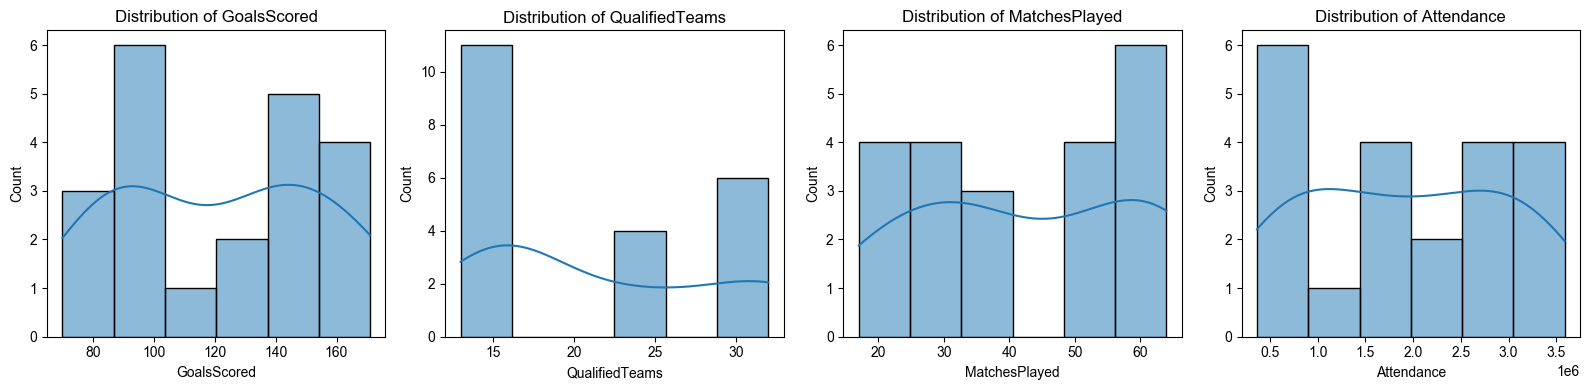

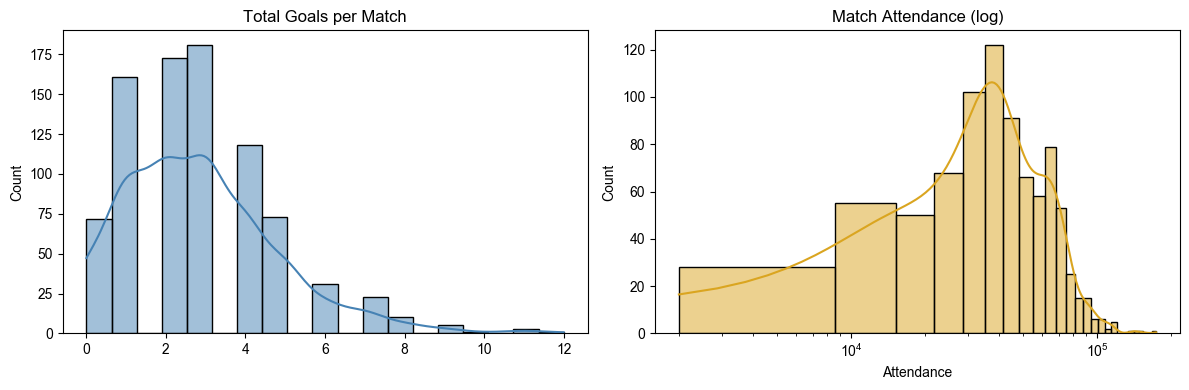

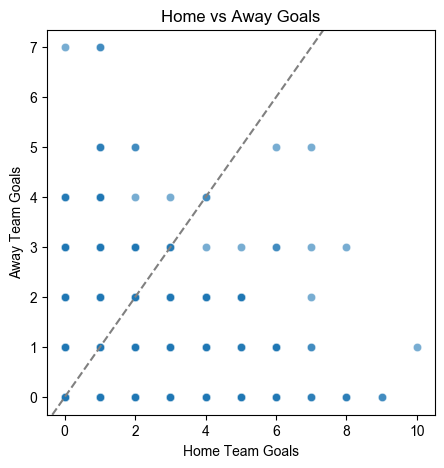

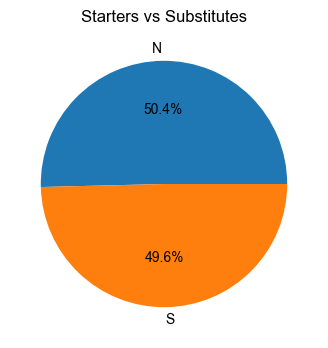

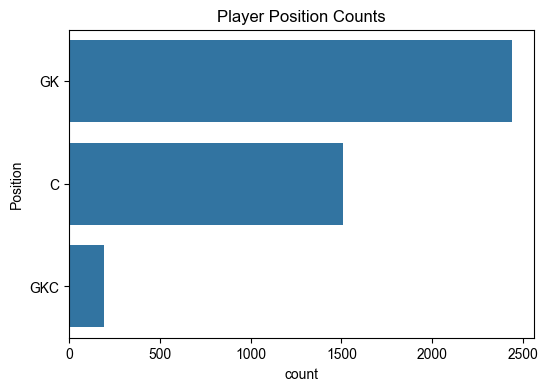

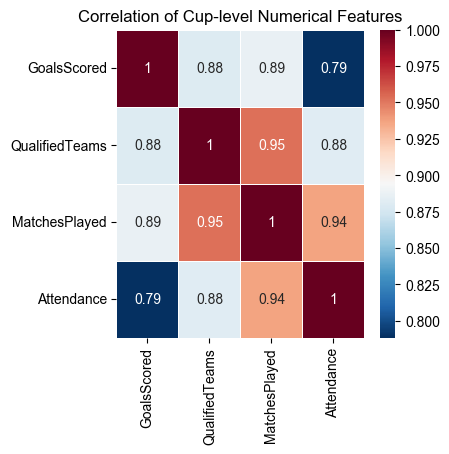

In [2]:
# ===================== 0. 环境 & 数据载入 =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family']      = ['sans-serif']
plt.rcParams['font.sans-serif']  = ['PingFang SC','Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 路径根据实际位置调整
cups    = pd.read_csv('WorldCupsSummary.csv')          # 21 × 12
matches = pd.read_csv('WorldCupMatches (2).csv')       # 852 × 19
players = pd.read_csv('WorldCupPlayers (1).csv')       # 37784 × 9

# ===================== 1. 快速体检 (info + 缺失) =====================
def quick_look(df, name):
    print(f'\n>>> {name}')
    display(df.head())
    print(df.info())
    print('Missing values:\n', df.isna().sum())

for df, name in [(cups,'Cups'), (matches,'Matches'), (players,'Players')]:
    quick_look(df, name)

# ===================== 2. WorldCupsSummary 分布 =====================
num_cols_cups = ['GoalsScored','QualifiedTeams','MatchesPlayed','Attendance']
fig, axes = plt.subplots(1, len(num_cols_cups), figsize=(16,4))
for ax, col in zip(axes, num_cols_cups):
    sns.histplot(cups[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

# ===================== 3. WorldCupMatches 分布 =====================
# 3‑A: 单变量——整场 & 半场进球
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(matches['Home Team Goals'] + matches['Away Team Goals'],
             kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Total Goals per Match')

sns.histplot(matches['Attendance'].dropna(), kde=True, ax=axes[1], color='goldenrod')
axes[1].set_title('Match Attendance (log)')
axes[1].set_xscale('log')
plt.tight_layout()

# 3‑B: 双变量——主队 vs 客队进球散点
plt.figure(figsize=(5,5))
sns.scatterplot(x='Home Team Goals', y='Away Team Goals', data=matches,
                alpha=0.6)
plt.title('Home vs Away Goals')
plt.axline((0,0),(1,1), ls='--', color='gray')
plt.show()

# ===================== 4. WorldCupPlayers 分布 =====================
# 4‑A: 首发 / 替补占比
plt.figure(figsize=(4,4))
players['Line-up'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Starters vs Substitutes')

# 4‑B: 位置分布
plt.figure(figsize=(6,4))
sns.countplot(y='Position', data=players, order=players['Position'].value_counts().index)
plt.title('Player Position Counts')
plt.show()

# ===================== 5. 相关性 & 热图示例 =====================
# 把世界杯层面的几个数值指标做一张热图
plt.figure(figsize=(4,4))
sns.heatmap(cups[num_cols_cups].corr(), annot=True, cmap='RdBu_r', linewidths=0.5)
plt.title('Correlation of Cup‑level Numerical Features')
plt.show()
